In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in data
data = pd.read_csv('/Users/kloeyap/ybell-data-analysis/data/gsheets_clean.csv', delimiter='\t')
data

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable
0,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545496,Linda Mar III,Digital,Streaming,2.0,0.001047
1,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545351,Kelly's Cove III,Digital,Streaming,3.0,0.001570
2,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545495,Linda Mar II,Digital,Streaming,1.0,0.000523
3,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545494,Linda Mar I,Digital,Streaming,1.0,0.000523
4,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545354,Rockaway Beach III,Digital,Streaming,3.0,0.001570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186160,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,ZA,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,3.0,0.004630
186161,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,BE,Surf Odyssey,KAIYO,US23A1540826,Whenever at Sea,Digital,General Stream,1.0,0.004451
186162,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,LV,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,1.0,0.001499
186163,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,MG,Changing Tide,KAIYO,US23A1545500,High Tide,Digital,General Stream,2.0,0.001532


____


In [61]:
data.isna().sum()

Contract Name             0
Source                    0
Sub Source                1
Stream Month              1
Territory               498
Release Title           476
Release Artist           48
ISRC                      8
Track Title               8
Distribution Channel      3
Configuration             3
Units                     4
Net Payable               9
Date                      1
dtype: int64

In [63]:
data[data['Release Artist'].isna()].head()

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
73356,KAIYO,Apple Music,iTunes,July 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-01
79003,KAIYO (PLT-YI2ybeW4),Apple Music,iTunes,September 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01
81768,KAIYO (PLT-YI2ybeW4),Apple Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
138197,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,April 2023,CO,NaN,NaN,US23A1563922,workday white noise,Digital,General Stream,3.0,0.002922,2023-04-01
138426,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,April 2023,KZ,NaN,NaN,US23A1563922,workday white noise,Digital,General Stream,14.0,0.012401,2023-04-01


In [64]:
def extract_artist(row):
    if pd.isna(row['Release Artist']):
        return row['Contract Name'].split(' (')[0]
    return row['Release Artist']


data['Release Artist'] = data.apply(extract_artist, axis=1)

What each row represents: Units per Stream Month per Track Title per Territory

Ex: 2 units = 2 streams for Linda Mar III in October 2022 in Territory RU

In [3]:
island_time = data[data['Release Title'] == 'Island Time']
island_time_spotify = island_time[island_time['Source'] == 'Spotify']
island_time_spotify

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable


In [4]:
spotify = data[data['Source'] == 'Spotify']
spotify.groupby('Release Title')[['Units']].sum().sort_values(by='Units', ascending=False)

,Units
Release Title,
sleep sounds,58129.0
what a night,36215.0
Surf Odyssey,26136.0
january deep sleep collection,18267.0
Nostalgia Pocket,16040.0
...,...
Trestles,1.0
Water Bungalow,1.0
lets sleep,1.0


In [5]:
sn = data[data['Track Title'] == 'past my bedtime']
sn = sn[sn['Source'] == 'Spotify']
sn['Units'].sum()

33793.0

Assumptions: We are interpreting `Units` in each column as the number of streams for that specific track title in a specific month. To ensure that this is a valid assumption, we checked with one of the songs, 'past my bedtime', on Spotify to compare the count with the stream count on Spotify. Since our data is not up to the current date, the value shown above, 33893 streams, should be less than the streams we see on Spotify since Spotify counts up to the current date. 

____

In [6]:
data.groupby('Distribution Channel')[['Units']].sum()

,Units
Distribution Channel,
Digital,85832828.0
Licensing,6.0


In [7]:
sourceinfo = data.groupby('Source')[['Units']].sum()
sourceinfo['proportion'] = sourceinfo['Units'].apply(lambda x : x / sum(sourceinfo['Units']))
sourceinfo.sort_values(by ='proportion', ascending=False)


,Units,proportion
Source,,
Apple Music,85214904.0,0.992801
Spotify,307200.0,0.003579
FUGA,152842.0,0.001781
YouTube,147566.0,0.001719
YouTube Red,9001.0,0.000105
iTunes,666.0,0.000008
iTunes Match,655.0,0.000008


Text(0.5, 1.0, 'Distribution of Streaming Sources')

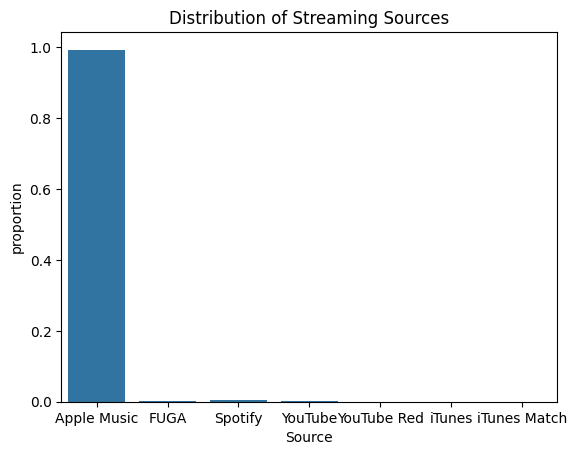

In [8]:
sns.barplot(data=sourceinfo, x='Source', y='proportion')
plt.title('Distribution of Streaming Sources')

As expected, Apple Music leads the way with about 99% of streams coming from the platform.

In [9]:
artist_count = data.groupby('Release Artist')[['Units']].sum()
# artist_count = artist_count.rename(columns = {'Release Artist' : 'count'})
artist_count['proportion'] = artist_count['Units'] / sum(artist_count['Units'])
artist_count.sort_values(by='proportion', ascending=False, inplace=True)
artist_count


,Units,proportion
Release Artist,,
chamberecho,55885600.0,0.651111
KAIYO,21661597.0,0.252375
Sharks Deli,3171939.0,0.036956
ebb,2178957.0,0.025387
the spaceheads,970390.0,0.011306
m a e a,855700.0,0.009970
MAIKU,666519.0,0.007765
Ric Wavy,440434.0,0.005131


chamberecho is the most popular artist with 65% of streams coming from them, followed by KAIYO. The two together combine with a total of about 90% of the streams.

In [10]:
artist_pay = data.groupby('Release Artist')[['Net Payable']].sum().sort_values(by = 'Net Payable', ascending=False)
artist_pay['Most Streamed Source'] = data.groupby('Release Artist')


In [11]:
data.groupby(['Release Artist', 'Source'])[['Units']].sum()

Units
Release Artist Source                  
KAIYO          Apple Music   21606090.0
               FUGA             25071.0
               Spotify          29964.0
               YouTube            210.0
               YouTube Red        188.0
               iTunes              54.0
               iTunes Match        20.0
MAIKU          Apple Music     524298.0
               FUGA               549.0
               Spotify           2684.0
               YouTube         134422.0
               YouTube Red       4531.0
               iTunes Match        35.0
Ric Wavy       Apple Music     422537.0
               FUGA               483.0
               Spotify          12448.0
               YouTube           4799.0
               YouTube Red        135.0
               iTunes               4.0
               iTunes Match        28.0
Sharks Deli    Apple Music    3139640.0
               FUGA              4191.0
               Spotify          20900.0
               YouTube           6759.0
               YouTube Red        280.0
               iTunes              63.0
               iTunes Match       106.0
chamberecho    Apple Music   55546535.0
               FUGA            116340.0
               Spotify         217032.0
               YouTube            958.0
               YouTube Red       3764.0
               iTunes             536.0
               iTunes Match       435.0
ebb            Apple Music    2161007.0
               FUGA              3479.0
               Spotify          14268.0
               YouTube            126.0
               YouTube Red         72.0
               iTunes Match         5.0
m a e a        Apple Music     852681.0
               FUGA               779.0
               Spotify           2219.0
               YouTube              4.0
               iTunes Match        17.0
the spaceheads Apple Music     960418.0
               FUGA              1950.0
               Spotify           7685.0
               YouTube            288.0
               YouTube Red         31.0
               iTunes               9.0
               iTunes Match         9.0

In [12]:
streams_per_territory = data.groupby('Territory')[['Units']].sum()
streams_per_territory.sort_values(by='Units', ascending=False) 

,Units
Territory,
US,60292832.0
CA,5566987.0
GB,3857749.0
AU,2360122.0
JP,2273632.0
...,...
LI,1.0
LS,1.0
MS,1.0


Most streams come from the United States.

In [13]:
data.groupby('Stream Month')[['Units']].count()

,Units
Stream Month,
April 2022,9727
April 2023,8747
August 2022,12979
December 2022,8801
February 2022,9098
February 2023,7862
January 2022,6988
January 2023,7759
July 2022,12006


June 2023 seemed to have the most streams. **The plan is to convert this data into datetime, so it can actually be sorted correctly, then plotted into a line plot to analyze the trends with respect to time. **

In [14]:
data['Date'] = pd.to_datetime(data['Stream Month'], format="%B %Y")
data

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
0,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545496,Linda Mar III,Digital,Streaming,2.0,0.001047,2022-10-01
1,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545351,Kelly's Cove III,Digital,Streaming,3.0,0.001570,2022-10-01
2,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545495,Linda Mar II,Digital,Streaming,1.0,0.000523,2022-10-01
3,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545494,Linda Mar I,Digital,Streaming,1.0,0.000523,2022-10-01
4,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545354,Rockaway Beach III,Digital,Streaming,3.0,0.001570,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186160,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,ZA,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,3.0,0.004630,2023-05-01
186161,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,BE,Surf Odyssey,KAIYO,US23A1540826,Whenever at Sea,Digital,General Stream,1.0,0.004451,2023-05-01
186162,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,LV,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,1.0,0.001499,2023-05-01
186163,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,MG,Changing Tide,KAIYO,US23A1545500,High Tide,Digital,General Stream,2.0,0.001532,2023-05-01


Text(0.5, 1.0, 'Total Streams per Month')

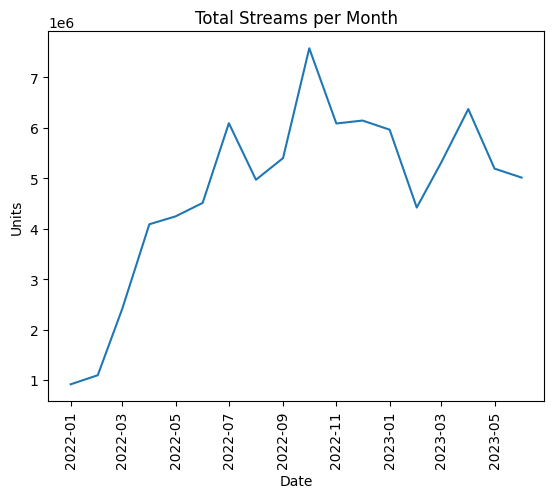

In [15]:
sort_time = data.sort_values(by='Date', ascending=True)
time_tbl = sort_time.groupby('Date')[['Units']].sum()
sns.lineplot(data=time_tbl, x='Date', y='Units')
plt.xticks(rotation=90)
plt.title('Total Streams per Month')


In [40]:
artist_time_streams = sort_time.groupby(['Release Artist', 'Date'])[['Units']].sum()
artist_time_streams = artist_time_streams.reset_index()
artist_time_streams

,Release Artist,Date,Units
0,KAIYO,2022-01-01,451681.0
1,KAIYO,2022-02-01,371690.0
2,KAIYO,2022-03-01,1176979.0
3,KAIYO,2022-04-01,1549285.0
4,KAIYO,2022-05-01,1362708.0
...,...,...,...
81,the spaceheads,2022-07-01,137068.0
82,the spaceheads,2022-08-01,94169.0
83,the spaceheads,2022-09-01,85548.0
84,the spaceheads,2022-10-01,114826.0


In [76]:
def generate_time_vs_streams_plots(name):
    artist_data = artist_time_streams[artist_time_streams['Release Artist'] == name]
    sns.lineplot(data=artist_data, x='Date', y='Units', label=name)
    # plt.title(name + ' Streams per Month per Year');

In [78]:
data['Release Artist'].unique()
artists

array(['ebb', 'chamberecho', 'MAIKU', 'KAIYO', 'Sharks Deli', 'Ric Wavy',
       'the spaceheads', 'm a e a'], dtype=object)

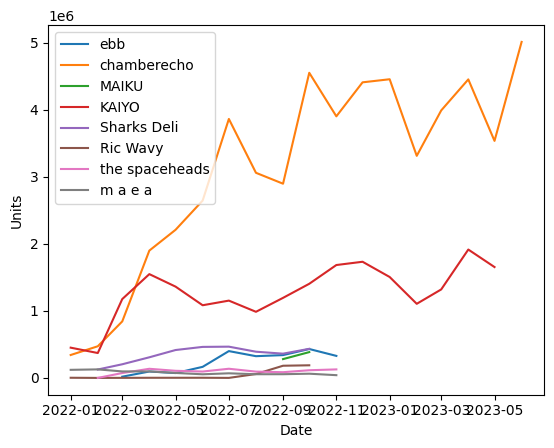

In [77]:
artists = data['Release Artist'].unique()
artists
for art in artists:
    generate_time_vs_streams_plots(art)

<Axes: xlabel='Date', ylabel='Units'>

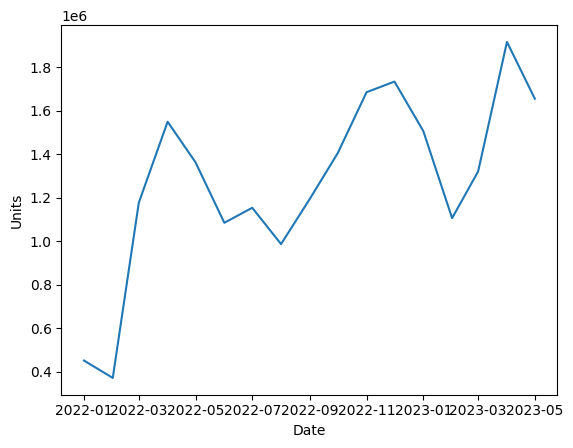

In [43]:
kaiyo_time_streams = artist_time_streams[artist_time_streams['Release Artist'] == 'KAIYO']

sns.lineplot(data=kaiyo_time_streams, x='Date', y='Units')

From this lineplot, I noticed a huge dip in streams from November 2022 to January 2023. What could be the cause of this? And then a sudden rise in May?

In [17]:
stream_counts = data.groupby(['Release Artist', 'Date'])[['Units']].sum().unstack(fill_value=0)
stream_counts

Units                                              \
Date           2022-01-01 2022-02-01 2022-03-01 2022-04-01 2022-05-01   
Release Artist                                                          
KAIYO            451681.0   371690.0  1176979.0  1549285.0  1362708.0   
MAIKU                 0.0        0.0        0.0        0.0        0.0   
Ric Wavy           2567.0      270.0     1122.0     2199.0     2324.0   
Sharks Deli           0.0   125567.0   203945.0   307983.0   416510.0   
chamberecho      342333.0   472541.0   843525.0  1900600.0  2210908.0   
ebb                   0.0        0.0    18464.0    95941.0    72635.0   
m a e a          120894.0   127523.0    97151.0    97412.0    74223.0   
the spaceheads        0.0      138.0    73033.0   136420.0   106386.0   

                                                                       \
Date           2022-06-01 2022-07-01 2022-08-01 2022-09-01 2022-10-01   
Release Artist                                                          
KAIYO           1084759.0  1153838.0   986916.0  1195051.0  1405167.0   
MAIKU                 0.0        0.0        0.0   280995.0   385524.0   
Ric Wavy           2625.0      614.0    58127.0   181954.0   188632.0   
Sharks Deli      463148.0   466710.0   391388.0   362181.0   434507.0   
chamberecho     2647060.0  3865072.0  3061526.0  2898698.0  4554129.0   
ebb              165428.0   400518.0   324611.0   340781.0   431633.0   
m a e a           54399.0    69016.0    55219.0    55586.0    63070.0   
the spaceheads    95472.0   137068.0    94169.0    85548.0   114826.0   

                                                                       \
Date           2022-11-01 2022-12-01 2023-01-01 2023-02-01 2023-03-01   
Release Artist                                                          
KAIYO           1685041.0  1733824.0  1506550.0  1106254.0  1320893.0   
MAIKU                 0.0        0.0        0.0        0.0        0.0   
Ric Wavy              0.0        0.0        0.0        0.0        0.0   
Sharks Deli           0.0        0.0        0.0        0.0        0.0   
chamberecho     3904382.0  4411739.0  4457675.0  3314670.0  3992525.0   
ebb              328946.0        0.0        0.0        0.0        0.0   
m a e a           41207.0        0.0        0.0        0.0        0.0   
the spaceheads   127330.0        0.0        0.0        0.0        0.0   

                                                 
Date           2023-04-01 2023-05-01 2023-06-01  
Release Artist                                   
KAIYO           1916137.0  1654824.0        0.0  
MAIKU                 0.0        0.0        0.0  
Ric Wavy              0.0        0.0        0.0  
Sharks Deli           0.0        0.0        0.0  
chamberecho     4455583.0  3537828.0  5014806.0  
ebb                   0.0        0.0        0.0  
m a e a               0.0        0.0        0.0  
the spaceheads        0.0        0.0        0.0

## Looking into chamberecho (most streamed artist)

In [18]:
chamberecho = data[data['Release Artist'] == 'chamberecho']
chamberecho

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
9144,chamberecho,Spotify,Spotify,January 2022,US,lazy Sunday morning,chamberecho,US23A1542153,lazy Sunday morning,Digital,Streaming,1.0,0.001562,2022-01-01
9145,chamberecho,Spotify,Spotify,January 2022,US,california night,chamberecho,US23A1543075,california night,Digital,Streaming,1.0,0.001015,2022-01-01
9146,chamberecho,Spotify,Spotify,January 2022,AR,monday watch the movie,chamberecho,US23A1541863,monday watch the movie,Digital,Streaming,1.0,0.000523,2022-01-01
9147,chamberecho,Spotify,Spotify,January 2022,GB,monday watch the movie,chamberecho,US23A1541863,monday watch the movie,Digital,Streaming,3.0,0.004611,2022-01-01
9148,chamberecho,Spotify,Spotify,January 2022,US,cuddle in the sheets,chamberecho,US23A1541864,cuddle in the sheets,Digital,Streaming,1.0,0.001550,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163444,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,RO,academic ambiance,chamberecho,US23A1562606,exam euphony,Digital,General Stream,135.0,0.292175,2023-06-01
163445,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,RO,immersive noise for sleep,chamberecho,US23A1559111,cold brew nation,Digital,General Stream,25.0,0.054106,2023-06-01
163446,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,TW,international study,chamberecho,US23A1560085,mon amour,Digital,General Stream,1.0,0.002309,2023-06-01
163447,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,TW,dog days,chamberecho,US23A1551451,snooze fest,Digital,General Stream,1.0,0.001442,2023-06-01


In [19]:
chamber_rtcount = chamberecho.groupby('Release Title')[['Units']].sum()
chamber_rtcount.sort_values(by='Units', ascending=False)


,Units
Release Title,
sleep sounds,20856007.0
dream on,4106989.0
bon voyage,3716556.0
what a night,3452514.0
immersive noise for sleep,3396712.0
...,...
food coma,1.0
road trip slumber,1.0
sleep medication,1.0


The table above gives us interesting findings as we can see that sleep sounds are the most streamed music produced by chamberecho. 

In [20]:
chamber_pay = chamberecho.groupby('Track Title')[['Net Payable']].sum().rename(columns = {'Release Title' : 'count'})
chamber_pay.sort_values(by = 'Net Payable', ascending=False)

,Net Payable
Track Title,
starry night,15913.357071
chill in bed,11298.935353
past my bedtime,9293.105854
sleep noise,8276.569470
crisp air,6682.902276
...,...
star signs,0.247769
brainstorm background,0.240079
note take noise,0.116697


#### Defining a function for simplicity

In [21]:
def get_info_from_artists(data, name):
    artist = data[data['Release Artist'] == name]

    most_pop_releases = artist.groupby('Release Title')[['Units']].sum()
    most_pop_releases = most_pop_releases.sort_values(by='Units', ascending=False)

    artist_pay = artist.groupby('Release Title')[['Net Payable']].sum()
    artist_pay = artist_pay.sort_values(by = 'Net Payable', ascending=False)

    artist_top_source = artist.groupby('Source')[['Units']].sum()
    artist_top_source = artist_top_source.sort_values(by='Units', ascending=False)
    return artist, most_pop_releases, artist_pay, artist_top_source
    

In [22]:
a, b, c, d = get_info_from_artists(data, 'KAIYO')
b.head(10)

,Units
Release Title,
Surf Odyssey,7430806.0
Summer Waves,2614328.0
Beach Stroll,2348519.0
Changing Tide,2076281.0
Ride the Wave,1335774.0
Tropical Bay,1276181.0
Sleep Waves,1117757.0
Blue Lagoon,869321.0
Ocean Breeze,735792.0


In [23]:
b.head(10)

,Units
Release Title,
Surf Odyssey,7430806.0
Summer Waves,2614328.0
Beach Stroll,2348519.0
Changing Tide,2076281.0
Ride the Wave,1335774.0
Tropical Bay,1276181.0
Sleep Waves,1117757.0
Blue Lagoon,869321.0
Ocean Breeze,735792.0


### Ric Wavy

In [24]:
ricwavy, ricwavy_topreleases, ricwavy_pay, ricwavy_topsources = get_info_from_artists(data, 'Ric Wavy')

In [25]:
ricwavy

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
95642,Ric Wavy,Spotify,Spotify,January 2022,US,try something,Ric Wavy,US23A1542103,try something,Digital,Streaming,2.0,0.001578,2022-01-01
95643,Ric Wavy,Spotify,Spotify,January 2022,CH,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1.0,0.000158,2022-01-01
95644,Ric Wavy,Spotify,Spotify,January 2022,US,try something,Ric Wavy,US23A1542103,try something,Digital,Streaming,1.0,0.001562,2022-01-01
95645,Ric Wavy,Spotify,Spotify,January 2022,US,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1333.0,1.353536,2022-01-01
95646,Ric Wavy,Spotify,Spotify,January 2022,PH,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1.0,0.000220,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98408,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,FR,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Video (Streaming),7.0,0.000000,2022-10-01
98409,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,KR,Touch The Sky,Ric Wavy,US23A1549959,Crate Break,Digital,Video (Streaming),5.0,0.000000,2022-10-01
98410,Ric Wavy (PLT-nmbQk4qu),YouTube Red,YouTube,October 2022,US,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Streaming,16.0,0.019931,2022-10-01
98411,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,GB,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Video (Streaming),13.0,0.000028,2022-10-01


In [26]:
ricwavy_topreleases

,Units
Release Title,
Touch The Sky,427270.0
leap into abyss,6945.0
try something,5963.0
Crate Break,210.0
Power To Dilla,46.0


Unlike chamberecho, it is hard to tell what type of music is the most streamed for Ric Wavy. They only have 5 release titles, so they do not have as many streams.

In [27]:
ricwavy_pay

,Net Payable
Release Title,
Touch The Sky,1008.840667
leap into abyss,7.505748
try something,6.559409
Power To Dilla,0.086175
Crate Break,0.072201


In [28]:
ricwavy_topsources

,Units
Source,
Apple Music,422537.0
Spotify,12448.0
YouTube,4799.0
FUGA,483.0
YouTube Red,135.0
iTunes Match,28.0
iTunes,4.0


### KAIYO

In [29]:
kaiyo, kaiyo_topreleases, kaiyo_pay, kaiyo_topsources = get_info_from_artists(data, 'KAIYO')

In [30]:
kaiyo_topreleases

,Units
Release Title,
Surf Odyssey,7430806.0
Summer Waves,2614328.0
Beach Stroll,2348519.0
Changing Tide,2076281.0
Ride the Wave,1335774.0
Tropical Bay,1276181.0
Sleep Waves,1117757.0
Blue Lagoon,869321.0
Ocean Breeze,735792.0


In [31]:
kaiyo_topsources

,Units
Source,
Apple Music,21606090.0
Spotify,29964.0
FUGA,25071.0
YouTube,210.0
YouTube Red,188.0
iTunes,54.0
iTunes Match,20.0


____

In [32]:
data

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
0,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545496,Linda Mar III,Digital,Streaming,2.0,0.001047,2022-10-01
1,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545351,Kelly's Cove III,Digital,Streaming,3.0,0.001570,2022-10-01
2,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545495,Linda Mar II,Digital,Streaming,1.0,0.000523,2022-10-01
3,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545494,Linda Mar I,Digital,Streaming,1.0,0.000523,2022-10-01
4,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545354,Rockaway Beach III,Digital,Streaming,3.0,0.001570,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186160,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,ZA,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,3.0,0.004630,2023-05-01
186161,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,BE,Surf Odyssey,KAIYO,US23A1540826,Whenever at Sea,Digital,General Stream,1.0,0.004451,2023-05-01
186162,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,LV,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,1.0,0.001499,2023-05-01
186163,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,MG,Changing Tide,KAIYO,US23A1545500,High Tide,Digital,General Stream,2.0,0.001532,2023-05-01
